# Predicting Car Prices


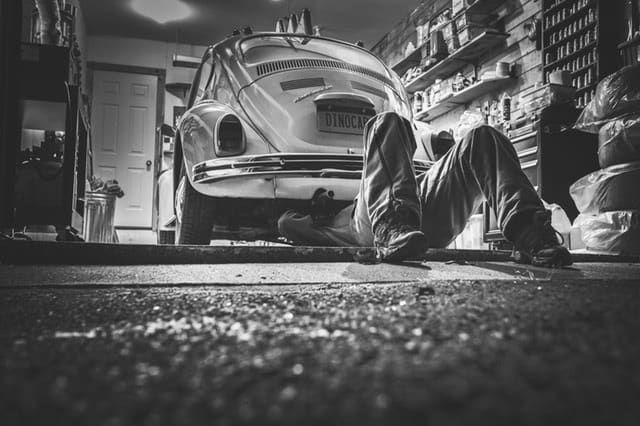


## 1. Introduction

The goal this project -  predict the price of used car's on the market  using its attributes. The data set contains information on various cars. Each car has  information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set here and can download it directly from <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" target="_blank">here</a>. 
The k-nearest neighbors algorithm will be used to predict the price of a used car.
Let's collect data about our dataset, download, open and explore:

In [1]:
# Import required modules
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')  
pd.set_option('display.max_columns', None)
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

# Open dataset and get info
used_cars = pd.read_csv("data/imports-85.data")

display(used_cars.head())

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.68,3.47,9.000,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.800,177.300,66.300,53.100,2507,ohc,five,136,mpfi,3.19,3.40,8.500,110,5500,19,25,15250


The first row shows that the dataset does not have columns with the names of technical parameters.
Using the attribute dictionary located <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names" target="_blank"> here</a>, reload dataset, add columns with names.
Also  I see that the first five columns of the dataset some columns contain the symbol `?`.
Replace `?` to NaN and view dataset.

In [2]:
# add columns to dataset and reload
columns_name = ["symboling", "normalized-losses", "make", "fuel-type", 
              "aspiration", "num-of-doors", "body-style", "drive-wheels",
              "engine-location", "wheel-base", "length", "width", "height",
              "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
              "fuel-system", "bore", "stroke", "compression-ratio", 
              "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

used_cars = pd.read_csv("data/imports-85.data", names = columns_name)
used_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.68,3.47,9.000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450


## 2. Data Cleaning and preprocessing

From the available columns in my opinion only the next columns have of practical value for potential buyers:
* make
* fuel-type
* num-of-doors
* body-style
* drive-wheels
* engine-type
* horsepower
* city-mpg
* highway-mpg
* price 

the the all remaining columns will be deleted.

In [3]:
# Replace ? to NaN and display NaN values
used_cars = used_cars.replace("?", np.nan)
print(used_cars.isna().sum())

#Define actual columns list for further analyzing
actual_columns = ["make", "fuel-type", "num-of-doors", "body-style",
                  "drive-wheels", "engine-type", "engine-size", "horsepower", "city-mpg",
                  "highway-mpg", "price"]
used_cars= used_cars.copy()[actual_columns]
used_cars.reset_index(drop = True, inplace = True)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


As seen above dataset has nan values in  `num-of-doors `, `bore `,  `horsepower`,  `stroke`  and `price` , remove its.

In [4]:
# Drop NaN values
used_cars = used_cars.dropna().copy()
used_cars.reset_index(drop = True, inplace = True)
print("\n")
used_cars.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          197 non-null    object
 1   fuel-type     197 non-null    object
 2   num-of-doors  197 non-null    object
 3   body-style    197 non-null    object
 4   drive-wheels  197 non-null    object
 5   engine-type   197 non-null    object
 6   engine-size   197 non-null    int64 
 7   horsepower    197 non-null    object
 8   city-mpg      197 non-null    int64 
 9   highway-mpg   197 non-null    int64 
 10  price         197 non-null    object
dtypes: int64(3), object(8)
memory usage: 17.1+ KB


As see above dataset lost 8 rows, approximately 4% from total rows. 
For using dataset for further ML encoding theirs string values to digit, convert all digit values to float, reorder column in more logical sequence, define the optimal scale conversion method. I don't use permutation of index, because `train_test_split` do it default when split dataset.

In [5]:
# Encode string columns
enc = OrdinalEncoder()

# List columns for encode
encode_columns = ["make", "fuel-type", "num-of-doors", "body-style",
                  "drive-wheels", "engine-type"]
# Add encoding columns
for feature in encode_columns:
    used_cars[feature + "_enc"] = enc.fit_transform(used_cars[[feature]])


# Convert columns 7 - 16 to float
used_cars.iloc[:, 6:] = used_cars.iloc[:, 6:].astype(float)

# Reorder columns for more clear understanding
used_cars = used_cars.reindex(columns=['make', 'fuel-type', 'num-of-doors', 
                                       'body-style', 'drive-wheels', 
                                       'engine-type', 'make_enc',
                                       'body-style_enc',  'num-of-doors_enc', 
                                       'drive-wheels_enc', 'fuel-type_enc', 
                                       'engine-type_enc', 'engine-size',
                                       'horsepower', 'city-mpg', 'highway-mpg',
                                       'price'])

# Make copy dataset for further normalization
used_cars_normal = used_cars.copy()

# Define columns for estimate  ratio values max / min
features_min_max = ['make_enc', 'body-style_enc',  'num-of-doors_enc', 
                    'drive-wheels_enc', 'fuel-type_enc', 'engine-type_enc', 
                    'engine-size', 'horsepower', 'city-mpg', 'highway-mpg',
                    'price']

# Print  min_max for defining optimal conversion type
for i, feature in enumerate(features_min_max):
    print(f"{i+1}. {feature}: max = {used_cars_normal[feature].max()}",
          f", min = {used_cars_normal[feature].min()}",
          f", ratio max/min ={used_cars_normal[feature].max()/used_cars_normal[feature].min():.3f}")


    
# Maximar ratio max/min = 8.871, hense normalizing  numeric values with using MinMaxScaler
scaler = MinMaxScaler()
used_cars_normal.iloc[:, 6:] = scaler.fit_transform(used_cars.iloc[:, 6:])

#  Check inf  values after conversation in transformed columns
print("\nInf values in the transformed columns:")
print(used_cars_normal.iloc[:, :].isin([np.inf, -np.inf]).sum(),"\n")

# View normalized dataset
display(used_cars_normal.head())

1. make_enc: max = 20.0 , min = 0.0 , ratio max/min =inf
2. body-style_enc: max = 4.0 , min = 0.0 , ratio max/min =inf
3. num-of-doors_enc: max = 1.0 , min = 0.0 , ratio max/min =inf
4. drive-wheels_enc: max = 2.0 , min = 0.0 , ratio max/min =inf
5. fuel-type_enc: max = 1.0 , min = 0.0 , ratio max/min =inf
6. engine-type_enc: max = 5.0 , min = 0.0 , ratio max/min =inf
7. engine-size: max = 326.0 , min = 61.0 , ratio max/min =5.344
8. horsepower: max = 262.0 , min = 48.0 , ratio max/min =5.458
9. city-mpg: max = 49.0 , min = 13.0 , ratio max/min =3.769
10. highway-mpg: max = 54.0 , min = 16.0 , ratio max/min =3.375
11. price: max = 45400.0 , min = 5118.0 , ratio max/min =8.871

Inf values in the transformed columns:
make                0
fuel-type           0
num-of-doors        0
body-style          0
drive-wheels        0
engine-type         0
make_enc            0
body-style_enc      0
num-of-doors_enc    0
drive-wheels_enc    0
fuel-type_enc       0
engine-type_enc     0
engine-size

,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-type,make_enc,body-style_enc,num-of-doors_enc,drive-wheels_enc,fuel-type_enc,engine-type_enc,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,two,convertible,rwd,dohc,0.000,0.000,1.000,1.000,1.000,0.000,260.377m,294.393m,222.222m,289.474m,207.959m
1,alfa-romero,gas,two,convertible,rwd,dohc,0.000,0.000,1.000,1.000,1.000,0.000,260.377m,294.393m,222.222m,289.474m,282.558m
2,alfa-romero,gas,two,hatchback,rwd,ohcv,0.000,500.000m,1.000,1.000,1.000,800.000m,343.396m,495.327m,166.667m,263.158m,282.558m
3,audi,gas,four,sedan,fwd,ohc,50.000m,750.000m,0.000,500.000m,1.000,400.000m,181.132m,252.336m,305.556m,368.421m,219.254m
4,audi,gas,four,sedan,4wd,ohc,50.000m,750.000m,0.000,0.000,1.000,400.000m,283.019m,313.084m,138.889m,157.895m,306.142m


For corresponding dataset`used_cars_normal` ready to Machine Learning. In the  real life the following columns will be required - the `make_year`, `number_owners` and `mileage` and can earn money by prediction price of used cars.


## 3.  Defining optimal hyperparameters for univariate model

As you know, the size of training set  determining  empirically in each case. I split dataset using  according to the <a href="https://docs.microsoft.com/en-us/analysis-services/data-mining/training-and-testing-data-sets?view=asallproducts-allversions" target="_blank">MS recommendations</a> for using ratio train to test  equal 70:30 as typical for the most  cases. Investigate the impact of different separate features and hyperparameters  on the accuracy of predicting the price of used cars.
Collect detailed  information and summary statistic about RMSE and k-nn for 1 to 30 and set size for training set equal 70%.

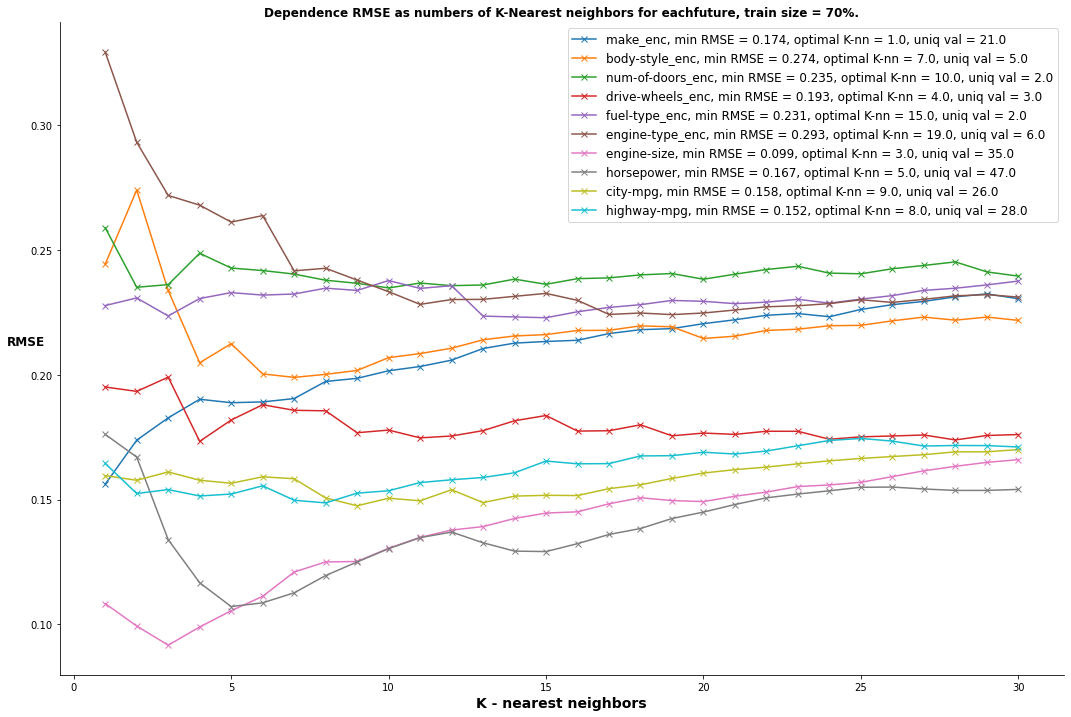

,optimal,make_enc,body-style_enc,num-of-doors_enc,drive-wheels_enc,fuel-type_enc,engine-type_enc,engine-size,horsepower,city-mpg,highway-mpg
0,optimal_k,1.000,7.000,10.000,4.000,15.000,19.000,3.000,5.000,9.000,8.000
1,minimal_rmse,156.224m,199.039m,234.881m,173.402m,222.946m,224.198m,91.702m,107.168m,147.564m,148.719m
2,numbers_of_unique,21.000,5.000,2.000,3.000,2.000,6.000,35.000,47.000,26.000,28.000
3,train_size %,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m


In [6]:
# Set range k-nn
k_val = np.array(range(1, 31))

# Define dataset for further filling RMSE and K-nn values
df_detail = pd.DataFrame(k_val, columns =["k_nn"])

# Split to train and test dataset with permutation using standard sklearn  train_test_split method
ts = 0.7
train, test = train_test_split(used_cars_normal.iloc[:, 6:].copy(),
                                                test_size = (1 - ts))

# Extract k-values and RMSE to df_detail
for i, feature in enumerate(features_min_max[:-1]):
    rmse=[]
    for k in k_val:
        # call  KNeighborsRegressor object
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit model
        knn.fit(train[[feature]], train.price)
        # Extract prediction
        prediction = knn.predict(test[[feature]])
        rmse.append(mean_squared_error(test.price, prediction)**(0.5))
    # Add values in df_detail
    df_detail.insert(i+1,feature, rmse)
    # Create pivot table for rmse
    # First column
    df_optimal_first_column = ["optimal_k", "minimal_rmse", "numbers_of_unique", 
                         "train_size %"]
# Create dataframe with one column
df_optimal = pd.DataFrame(df_optimal_first_column, columns = ["optimal"])  
# Insert minimal RMSE, optimal k and length unique values
for i, feature in enumerate(features_min_max[:-1]):
    min_rmse = df_detail[feature].min()
    optimal_k = df_detail.k_nn[df_detail[feature]==min_rmse].values[0]
    # numbers of unique values taken from train_uni dataset
    numbers_unique = len(train[feature].unique())
    rmse_pvt_val=[]
    rmse_pvt_val.append(optimal_k)
    rmse_pvt_val.append(min_rmse)
    rmse_pvt_val.append(numbers_unique)
    rmse_pvt_val.append(ts)
    df_optimal.insert(i+1, feature, rmse_pvt_val)


# Using default pandas plot
fig, ax = plt.subplots(figsize = (18, 12))
ax = df_detail.set_index("k_nn").plot.line(ax = ax, marker='x')
handles, labels = ax.get_legend_handles_labels()
for i, feature in enumerate(labels[:]):
    add_values = ", min RMSE = " + \
    str(round(df_detail.loc[1, feature], 3)) + \
", optimal K-nn = "+ \
    str(df_optimal.loc[0, feature]) + ", uniq val = " +\
    str(df_optimal.loc[2, feature])              
    labels[i] += add_values
ax.legend(labels = labels, fontsize=12)
ax.set_xlabel('K - nearest neighbors', weight = "bold", fontsize = 14)
ax.set_ylabel('RMSE', weight = "bold", fontsize = 12, rotation=0)
ax.set_title("Dependence RMSE as numbers of K-Nearest neighbors for each\
future, train size = 70%.", weight = "bold", 
             fontsize = 12)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()
display(df_optimal)

Plot and tables show dependence that  the more values that differ from each other in a column -  the higher the accuracy of the prediction. The optimal value of k-nnn is in the range from 3 to 10.
**Notice**  that the train_test_split method constantly shuffles the columns and each time the code is loaded in a cell, both the graph view and the table of values will have new values each time.

## 4. Defining optimal hyperparameters for multivariate Model

It is known that  scikit-learn <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics" target="_blank">regression metrics</a> paragraph 3.3 it has several metrics for evaluation prediction accuracy.  Investigate dependence for RMSE and  <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination" target="_blank">R² score</a>.

I write three functions necessary for analyzing the dependencies of optimal values k-nn for a different number of features. 

First function for calculation RMSE - `knn_rmse_multy`.

In [7]:
def knn_rmse_multy(feature_list, ratio):
    """
    Take list of features, ratio train size/all size and calculate RMSE for 
    k-nn from 1 to 30 and return  dataframes df_detail contains detailed data 
    of RMSE and K-nn and  df_optimal with optimal k-nn values with mimimal RMSE
    """
    feature = feature_list[:]
    # Function prototype
    # Set range k-nn
    k_val = np.array(range(1, 31))
    
    # Define dataset for further filling RMSE and K-nn values
    df_detail = pd.DataFrame(k_val, columns =["k_nn"])
    
    # Split to train and test dataset with permutation
    part = ratio
    train, test = train_test_split(used_cars_normal.copy().iloc[:, 6:],
                                                    test_size = (1 - part))
    
    # Extract k-values and RMSE to df_detail
    rmse=[]
    for k in k_val:
        # call  KNeighborsRegressor object
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit model
        knn.fit(train[feature], train.price)
        # Extract prediction
        prediction = knn.predict(test[feature])
        rmse.append(mean_squared_error(test.price, prediction)**(0.5))
    # Add values in df_detail
    feature_label = str(len(feature)) + " features"
    df_detail.insert(1,feature_label, rmse)
    
    # Create pivot table for minimal RMSE and optimal k-nn
    # First column
    df_optimal_first_column = ["optimal_k", "minimal_rmse", 
                         "train_size %"]
    # Create dataframe with one column
    df_optimal = pd.DataFrame(df_optimal_first_column, columns = ["optimal"])  
    # Insert minimal RMSE, optimal k and test size and columns with future name
    min_rmse = df_detail[feature_label].min()
    optimal_k = df_detail.k_nn[df_detail[feature_label]==min_rmse].values[0]
    rmse_pvt_val=[]
    rmse_pvt_val.append(optimal_k)
    rmse_pvt_val.append(min_rmse)
    rmse_pvt_val.append(part)
    df_optimal.insert(1, feature_label, rmse_pvt_val)
    return df_detail, df_optimal

Second function for calculation R² - `knn_r2_score_multy`.

In [8]:
def knn_r2_score_multy(feature_list, ratio):
    """
    Take list of features, ratio train size/all size and calculate score for 
    k-nn from 1 to 30 and return  dataframes df_detail contains detailed data 
    of score and K-nn and  df_optimal with optimal k-nn values with 
    highest score
    """
    feature = feature_list[:]
    # Function prototype
    # Set range k-nn
    k_val = np.array(range(1, 31))
    
    # Define dataset for further filling RMSE and K-nn values
    df_detail = pd.DataFrame(k_val, columns =["k_nn"])
    
    # Split to train and test dataset with permutation
    part = ratio
    train, test = train_test_split(used_cars_normal.copy().iloc[:, 6:],
                                                    test_size = (1 - part))
    
    # Extract k-values and RMSE to df_detail
    scores=[]
    for k in k_val:
        # call  KNeighborsRegressor object
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit model
        knn.fit(train[feature], train.price)
        # Extract prediction
        prediction = knn.predict(test[feature])
        scores.append(r2_score(test.price, prediction))
    # Add values in df_detail
    feature_label = str(len(feature)) + " features"
    df_detail.insert(1,feature_label, scores)
    
    # Create pivot table for highest score and optimal k-nn
    # First column
    df_optimal_first_column = ["optimal_k", "highest_r2_score", 
                         "train_size %"]
    # Create dataframe with one column
    df_optimal = pd.DataFrame(df_optimal_first_column, columns = ["optimal"])  
    # Insert maximal R2, optimal k and test size and columns with "len(future)" name
    max_score = df_detail[feature_label].max()
    optimal_k = df_detail.k_nn[df_detail[feature_label]==max_score].values[0]
    # numbers of unique values taken from train_uni dataset
    r2_pvt_val=[]
    r2_pvt_val.append(optimal_k)
    r2_pvt_val.append(max_score)
    r2_pvt_val.append(part)
    df_optimal.insert(1, feature_label, r2_pvt_val)
    return df_detail, df_optimal

Third function for concatenation dataframes with detailed information and pivot tables with optimal k-nn values - `rmse_r2_concat`.

In [9]:
def rmse_r2_concat(list_of_features):
    """
    Parameters
    ----------
    list_of_features : list of list
    DESCRIPTION: Teake list futures.
    Returns: four dataframe for RMSE and r2 values:  df_rmse and df_r2 with 
    detailed data for furhter plot and  df_rmse_opt and df_r2_opt witn
    optimal parametr
    """
    features = list_of_features[:]
    df_rmse, df_rmse_opt = knn_rmse_multy(features[0], 0.7)
    df_r2, df_r2_opt = knn_r2_score_multy(features[0], 0.7)
    for value in features[1:]:
        # Concate rmse
        rmse, rmse_opt = knn_rmse_multy(value, 0.7)
        df_rmse = df_rmse.merge(rmse, how="inner")
        df_rmse_opt = df_rmse_opt.merge(rmse_opt, how = "inner")
        #concate r2
        r2, r2_opt = knn_r2_score_multy(value, 0.7)
        df_r2 = df_r2.merge(r2, how = "inner")
        df_r2_opt = df_r2_opt.merge(r2_opt, how = "inner")
    return df_rmse, df_rmse_opt, df_r2, df_r2_opt

Define randomly list of lists with features from 2 to 10.

In [10]:
features_random = []
features_l = features_min_max[:-1]
for i in range(2,len(features_l)+1):
    add = random.choices(features_l, k = i)
    features_random.append(add)

# Train models and output summary values  to dataframes
rmse_det, rmse_min, r2_det, r2_max = rmse_r2_concat(features_random)

Plot RMSE values and display optimal k-nn and lowest RMSE. 

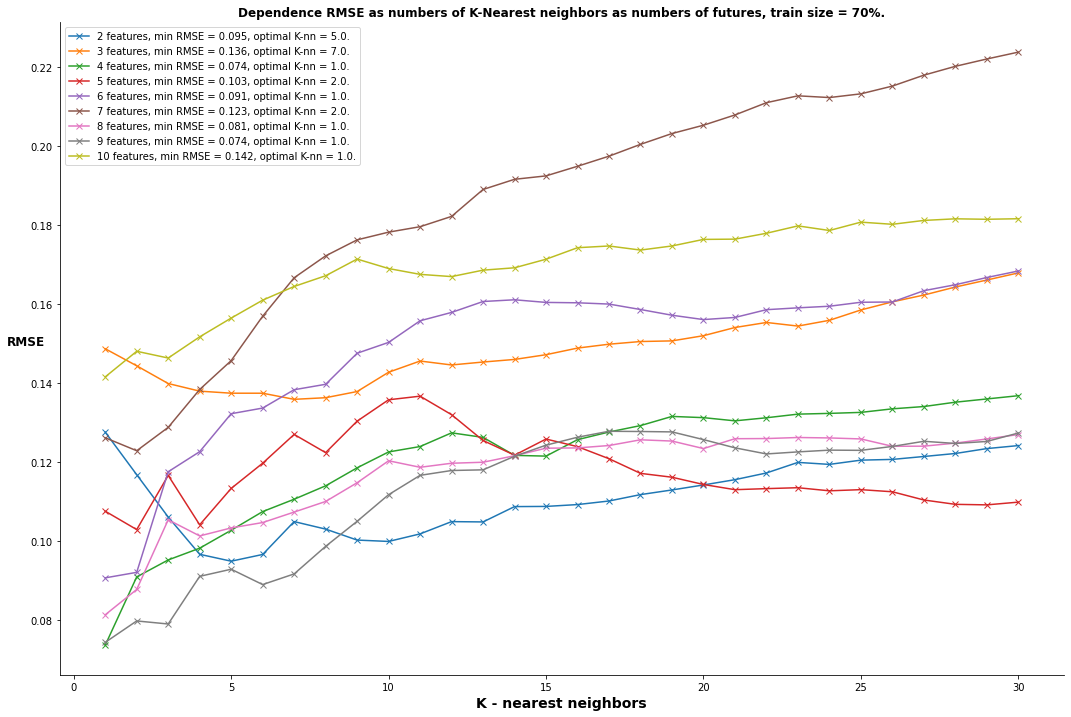

In [11]:
fig, ax = plt.subplots(figsize = (18, 12))
ax = rmse_det.set_index("k_nn").plot.line(ax = ax, marker='x')
handles, labels = ax.get_legend_handles_labels()
for i, value in enumerate(labels[:]):
    add_values = ", min RMSE = " + \
    str(round(rmse_min.loc[1, value], 3)) + \
", optimal K-nn = "+ \
    str(rmse_min.loc[0, value]) + "."        
    labels[i] += add_values
ax.legend(labels = labels)
ax.set_xlabel('K - nearest neighbors', weight = "bold", fontsize = 14)
ax.set_ylabel('RMSE', weight = "bold", fontsize = 12, rotation=0)
ax.set_title("Dependence RMSE as numbers of K-Nearest neighbors as numbers of \
futures, train size = 70%.", weight = "bold", 
              fontsize = 12)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()

In [12]:
display(rmse_min)

,optimal,2 features,3 features,4 features,5 features,6 features,7 features,8 features,9 features,10 features
0,optimal_k,5.000,7.000,1.000,2.000,1.000,2.000,1.000,1.000,1.000
1,minimal_rmse,94.964m,135.922m,73.717m,102.961m,90.746m,122.913m,81.398m,74.423m,141.600m
2,train_size %,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m


Plot R² values and display optimal k-nn and highest . 

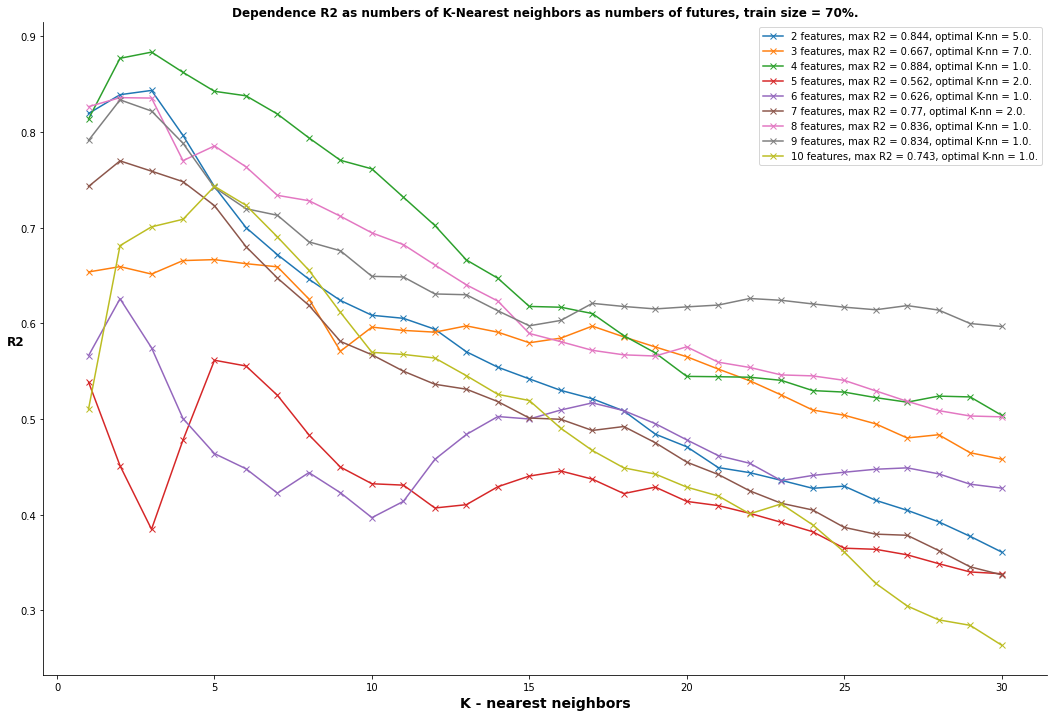

In [13]:
fig, ax = plt.subplots(figsize = (18, 12))
ax = r2_det.set_index("k_nn").plot.line(ax = ax, marker='x')
handles, labels = ax.get_legend_handles_labels()
for i, value in enumerate(labels[:]):
    add_values = ", max R2 = " + \
    str(round(r2_max.loc[1, value], 3)) + \
", optimal K-nn = "+ \
    str(rmse_min.loc[0, value]) + "."        
    labels[i] += add_values
ax.legend(labels = labels)
ax.set_xlabel('K - nearest neighbors', weight = "bold", fontsize = 14)
ax.set_ylabel('R2', weight = "bold", fontsize = 12, rotation=0)
ax.set_title("Dependence R2 as numbers of K-Nearest neighbors as numbers of \
futures, train size = 70%.", weight = "bold", 
              fontsize = 12)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()

In [14]:
display(r2_max)

,optimal,2 features,3 features,4 features,5 features,6 features,7 features,8 features,9 features,10 features
0,optimal_k,3.000,5.000,3.000,5.000,2.000,2.000,2.000,2.000,5.000
1,highest_r2_score,843.620m,666.748m,883.652m,561.570m,625.838m,769.971m,836.063m,833.754m,743.348m
2,train_size %,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m,700.000m


It can be seen that it accuracy of prediction decreases with increasing number of features.
The optimal k-nn values are in the range  from 1 to  9. 
As  the train sets and samples of features  are random the optimal values k-nn, min RMSE and max R²  are constantly changing.
Maximal value R² for all features in the most cases has value in range 60% - 90%, but you can get and negative R² for some features  dependence of quality your train set and random choice features. 

## 5. k-fold cross validation 

`Cross-validation is a statistical method used to estimate the skill of machine learning models.
It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.` 
©
<a href="https://machinelearningmastery.com/k-fold-cross-validation/" target="_blank">Jason Brownlee</a>.
It is known that the optimal value is k=10. In this case numbers of k and is of a theoretical nature. Formally 

`The choice of k is usually 5 or 10, but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller`

<a href="https://amzn.to/2Fmrbib" target="_blank">— Page 70, Applied Predictive Modeling, 2013.</a>

Formally investigate influence k-fold for RMSE and  R² and print its.

In [15]:
# 5. k-fold cross validation
# Validation with different k-fold for default value knn = 5
folds_k = np.array(range(2,21))
fold_ds = used_cars_normal.copy().iloc[:, 6:]
fold_features = ['make_enc', 'body-style_enc',  'num-of-doors_enc', 
                'drive-wheels_enc', 'fuel-type_enc', 'engine-type_enc', 
                'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
for fold in folds_k:
    model_knr = KNeighborsRegressor()
    kf = KFold(fold, shuffle=True, random_state=1)
    # Extract RMSE
    mses = cross_val_score(model_knr,fold_ds[fold_features].copy(),
                           fold_ds["price"].copy(),
                           scoring="neg_mean_squared_error", 
                           cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    rmse_mean = np.mean(rmses)
    std_rmse = np.std(rmses)
    # Extract R2
    r2es = cross_val_score(model_knr,fold_ds[fold_features].copy(),
                           fold_ds["price"].copy(),
                           scoring="r2", 
                           cv=kf)
    r2es_mean = np.mean(r2es)
    r2es_std = np.std(r2es)
    print(str(fold), "k-folds,", f"train size = {(1-1.0/fold):.2%},",
          " mean RMSE: ", str(rmse_mean), "std RMSE:", str(std_rmse))
    print(str(fold), "k-folds,", f"train size = {(1-1.0/fold):.2%},", 
          " mean R2: ", str(r2es_mean), "std R2: ", str(r2es_std))

2 k-folds, train size = 50.00%,  mean RMSE:  0.13089148960141994 std RMSE: 0.000719857384639852
2 k-folds, train size = 50.00%,  mean R2:  0.5565805637587018 std R2:  0.05125063863095347
3 k-folds, train size = 66.67%,  mean RMSE:  0.11243482283121416 std RMSE: 0.015538177542357269
3 k-folds, train size = 66.67%,  mean R2:  0.6760281422783841 std R2:  0.06381523849864348
4 k-folds, train size = 75.00%,  mean RMSE:  0.11155850491321122 std RMSE: 0.019386293881982854
4 k-folds, train size = 75.00%,  mean R2:  0.6582370928565034 std R2:  0.15624236826361704
5 k-folds, train size = 80.00%,  mean RMSE:  0.11633561941243338 std RMSE: 0.02281156137037081
5 k-folds, train size = 80.00%,  mean R2:  0.6392568126328487 std R2:  0.10511402435147534
6 k-folds, train size = 83.33%,  mean RMSE:  0.10695266252661678 std RMSE: 0.028836808358473118
6 k-folds, train size = 83.33%,  mean R2:  0.6942104676511262 std R2:  0.10999646723955493
7 k-folds, train size = 85.71%,  mean RMSE:  0.10298788891435087 s

It can be seen that with increasing train size, as a rule, the accuracy prediction of the model also increases, which in practice allows you to roughly estimate the required  train size. Keep the mind  that in this case using not optimal k-nn values for this features. 

In my opinion the main value of cross validation is the selection of the optimal value of k-nn values before training the model. Check it for fixed `k-fold = 10`

In [16]:
k_nn = np.array(range(1,16))
for k in k_nn:
    model_knr = KNeighborsRegressor(n_neighbors = k)
    kf = KFold(10, shuffle=True, random_state=1)
    mses = cross_val_score(model_knr,fold_ds[fold_features].copy(),
                           fold_ds["price"].copy(),
                           scoring="neg_mean_squared_error", 
                           cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    rmse_mean = np.mean(rmses)
    std_rmse = np.std(rmses)
    r2es = cross_val_score(model_knr,fold_ds[fold_features].copy(),
                           fold_ds["price"].copy(),
                           scoring="r2", 
                           cv=kf)
    r2es_mean = np.mean(r2es)
    r2es_std = np.std(r2es)
    print(str(k), "k-nn, mean RMSE: ", str(rmse_mean), "std RMSE: ", str(std_rmse))
    print(str(k), "k-nn, mean R2: ", str(r2es_mean), "std R2: ", str(r2es_std))

1 k-nn, mean RMSE:  0.09712291337061893 std RMSE:  0.03490225049845181
1 k-nn, mean R2:  0.693978792764743 std R2:  0.1257138091530604
2 k-nn, mean RMSE:  0.08653753827212116 std RMSE:  0.0352251141933749
2 k-nn, mean R2:  0.748365958881571 std R2:  0.1513118549866339
3 k-nn, mean RMSE:  0.09251051422117426 std RMSE:  0.035022486688649296
3 k-nn, mean R2:  0.7136022506042058 std R2:  0.14669605736707222
4 k-nn, mean RMSE:  0.09902182495782333 std RMSE:  0.035285296204673404
4 k-nn, mean R2:  0.6695446293437334 std R2:  0.15325580089768884
5 k-nn, mean RMSE:  0.10522822882383409 std RMSE:  0.03867942904619742
5 k-nn, mean R2:  0.6493600953217988 std R2:  0.1345234690550561
6 k-nn, mean RMSE:  0.10649191750779483 std RMSE:  0.04023088557258272
6 k-nn, mean R2:  0.6464298572129444 std R2:  0.1366971070654578
7 k-nn, mean RMSE:  0.1100277976447781 std RMSE:  0.04269968076416515
7 k-nn, mean R2:  0.6279944010949343 std R2:  0.14446565555155896
8 k-nn, mean RMSE:  0.10838952590073272 std RMS

It can be seen that the optimal k-nn values  for all features nearest  with the k-nn values shown in the graphs above. Keep the mind that on graphs using different dataset that here. In this case I assume that for all features optimal k-nn values has range 2 - 4.

## Conclusion:

* k-fold validation allows you quickly select the optimal hyper parameters for further model training  that aren't always equal to the default values of hyper parameters for sets of features.

* k-fold equal 10 it is quite enough for practical using  in this case and doesn't take a long of time .

 
Created on July 10, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: Debian 10, Python 3.8.7

See required installed and imported  python modules in the cell No 1.